#### Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

### Construção da Carteira

In [ ]:
# Periodo:
inicio_date = '2019-01-01'
final_date = '2023-09-18'

# Seleção dos ativos:
ativos = ['PETR4', 'VALE3', 'BBDC4', 'ITSA4', 'ABEV3', 'WEGE3', 'CYRE3', 'UGPA3', 'TAEE4', 'BBAS3']

# Adicionando o .SA no final de cada ativo para ativar o yfinance reconhecer os papeis da bolsa brasileira!
ativos_brasileiros = [i +'.SA' for i in ativos]
print(ativos_brasileiros)

['PETR4.SA', 'VALE3.SA', 'BBDC4.SA', 'ITSA4.SA', 'ABEV3.SA', 'WEGE3.SA', 'CYRE3.SA', 'UGPA3.SA', 'TAEE4.SA', 'BBAS3.SA']


In [ ]:
# Pesos de cada ativo na carteira:
peso = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
# 10 % em cada, totalizando 100% na soma

In [ ]:
# Construção agora carteira de fato:
carteira = yf.download(ativos_brasileiros, start=inicio_date, end=final_date)['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [ ]:
carteira.head()

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2019-01-02,13.950425,35.381218,19.965736,12.176569,8.482637,8.899590,4.932968,24.476288,35.196037,8.423653
2019-01-03,14.105911,35.526825,20.167997,12.376060,8.556402,9.117827,4.984826,24.021360,33.756229,8.615737
2019-01-04,14.295947,35.526825,20.009745,12.268642,8.529579,9.143719,5.159846,23.859205,35.953831,8.714121
2019-01-07,14.235482,35.293869,20.247135,12.199589,8.522874,9.287975,5.056130,23.129513,35.760941,8.578258
2019-01-08,13.950425,34.893456,20.370771,12.115189,8.636867,9.232493,5.120952,22.746647,36.105396,8.507981


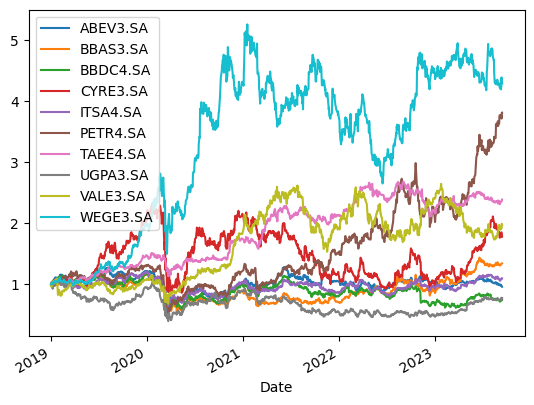

In [ ]:
# normalizando os Ativos da carteira
# para que todos partam do mesmo ponto incial
(carteira / carteira.iloc[0]).plot();
# Para que todos ativos comecem na base 1
# muito importante isso!

### Retorno Diário e Retorno Acumulado

In [ ]:
retornos = carteira.pct_change()
# Função pronta no pandas para calcular já esse percentual retorno ]
# Como ele calcular a variação percentual _> o dia "atual" - dia anterior _> A primeira linha sempre vai ser NaN
# pois ela não tem referencia passada para comparar e calcular!
retornos

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.011146,0.004115,0.010130,0.016383,0.008696,0.024522,0.010513,-0.018586,-0.040908,0.022803
2019-01-04,0.013472,0.000000,-0.007847,-0.008679,-0.003135,0.002840,0.035111,-0.006750,0.065102,0.011419
2019-01-07,-0.004230,-0.006557,0.011864,-0.005628,-0.000786,0.015777,-0.020100,-0.030583,-0.005365,-0.015591
2019-01-08,-0.020024,-0.011345,0.006106,-0.006918,0.013375,-0.005974,0.012820,-0.016553,0.009632,-0.008192
...,...,...,...,...,...,...,...,...,...,...
2023-09-11,0.012409,0.015866,0.018776,0.029194,0.024417,-0.000898,0.009565,0.031556,0.014391,-0.003390
2023-09-12,-0.011536,0.005403,0.012287,0.014858,0.004334,0.004795,0.002584,0.007911,-0.000739,0.010488
2023-09-13,-0.005106,-0.000846,0.004046,0.000887,0.000000,-0.014912,0.000000,-0.040816,-0.003845,0.035905


#### Retorno Diário da Carteira

In [ ]:
retorno_carteira = (retornos*peso).sum(axis=1)
retorno_carteira

Date
2019-01-02    0.000000
2019-01-03    0.004881
2019-01-04    0.010153
2019-01-07   -0.006120
2019-01-08   -0.002707
                ...   
2023-09-11    0.015189
2023-09-12    0.005039
2023-09-13   -0.002469
2023-09-14    0.005035
2023-09-15   -0.000464
Length: 1171, dtype: float64

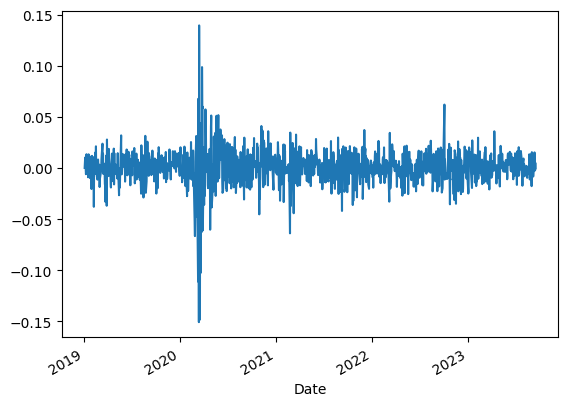

In [ ]:
retorno_carteira.plot();

#### Retorno Acumulado

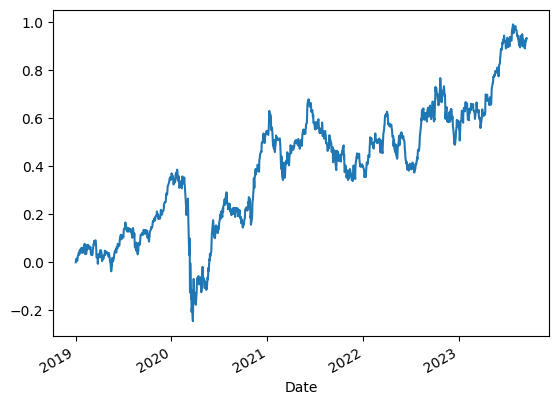

In [ ]:
retorno_acumulado_carteira = (1 + retorno_carteira).cumprod() - 1  #Retorno na base 0 para expressar melhor o gráfico
retorno_acumulado_carteira.plot();

### Comparativo de Desempenho

In [ ]:
ibov = yf.download('^BVSP', start=inicio_date, end=final_date)['Adj Close']
ibov

[*********************100%%**********************]  1 of 1 completed


Date
2019-01-02     91012.0
2019-01-03     91564.0
2019-01-04     91841.0
2019-01-07     91699.0
2019-01-08     92032.0
                ...   
2023-09-11    116883.0
2023-09-12    117968.0
2023-09-13    118176.0
2023-09-14    119392.0
2023-09-15    118758.0
Name: Adj Close, Length: 1171, dtype: float64

In [ ]:
ibov_retorno = ibov.pct_change()
retorno_acumulado_ibov = (1 + ibov_retorno).cumprod() - 1

In [ ]:
# Criar um DF vazio, que vou popular com esses dois dados
retorno_portifolio = pd.DataFrame()
retorno_portifolio['Retorno da Carteira'] = retorno_acumulado_carteira
retorno_portifolio['IBOV'] = retorno_acumulado_ibov

# Tratando os NaN
retorno_portifolio = retorno_portifolio.dropna()

display(retorno_portifolio)

,Retorno da Carteira,IBOV
Date,,
2019-01-03,0.004881,0.006065
2019-01-04,0.015084,0.009109
2019-01-07,0.008872,0.007548
2019-01-08,0.006140,0.011207
2019-01-09,0.019634,0.028579
...,...,...
2023-09-11,0.917934,0.284259
2023-09-12,0.927597,0.296181
2023-09-13,0.922839,0.298466


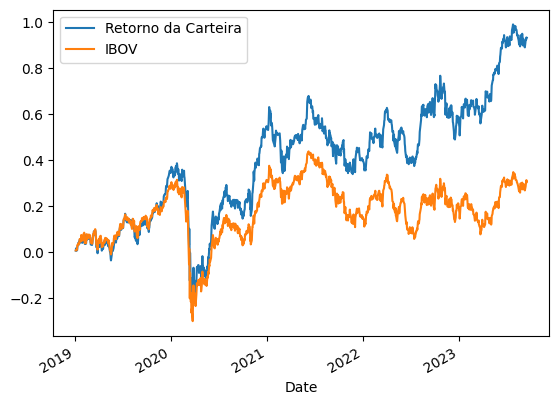

In [ ]:
retorno_portifolio.plot();

### Apresentando a Função `Resample`

função usada em cima dos df's de retornos para agrupar em determinado periodo de tempo

In [47]:
# Agrupando os retornos em 1 semana(W = WEEK) e a partir disso calculando a média
carteira_media_semanal = retorno_carteira.resample('W').mean()
carteira_media_semanal

Date
2019-01-06    0.005012
2019-01-13    0.002707
2019-01-20    0.004597
2019-01-27    0.002032
2019-02-03    0.000183
                ...   
2023-08-20   -0.004111
2023-08-27    0.000125
2023-09-03    0.002325
2023-09-10   -0.004981
2023-09-17    0.004466
Freq: W-SUN, Length: 246, dtype: float64

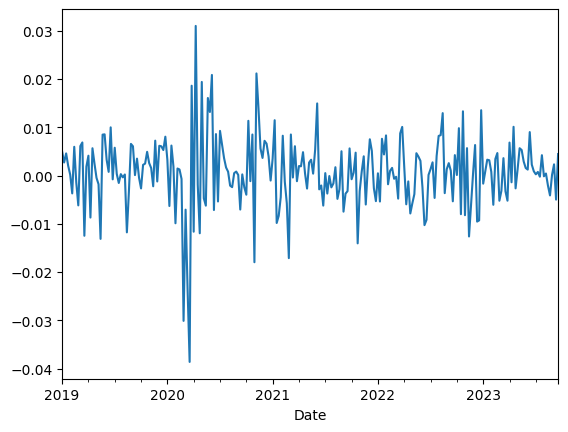

In [48]:
carteira_media_semanal.plot();

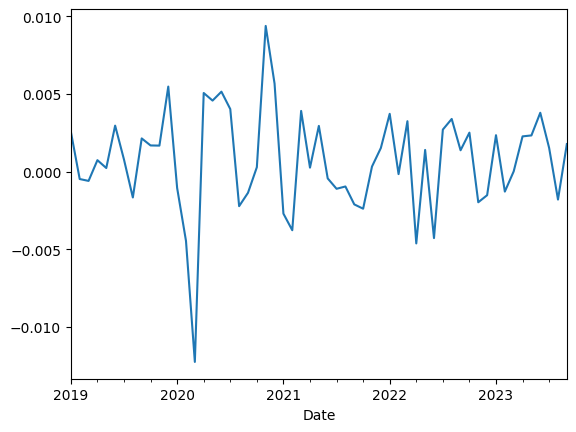

In [49]:
carteira_media_mensal = retorno_carteira.resample('M').mean()
carteira_media_mensal.plot();

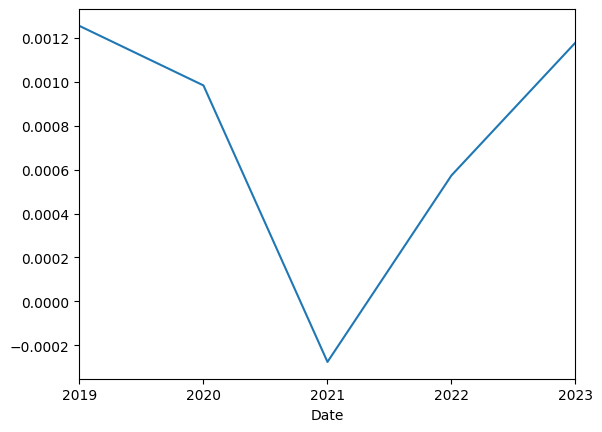

In [50]:
carteira_media_anual = retorno_carteira.resample('Y').mean()
carteira_media_anual.plot();

<Axes: xlabel='Date'>

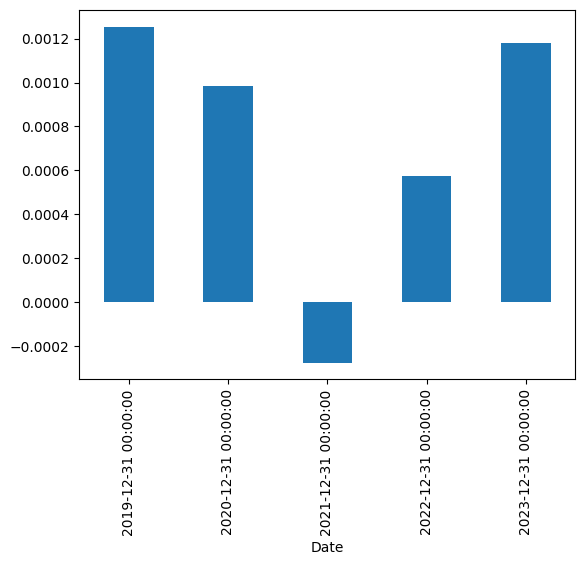

In [51]:
carteira_media_anual.plot.bar()